# Assignment 01 (Due: 12th Oct.)

In [ ]:
import random
import sympy as sp 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(sp.__version__)
print(pd.__version__)
print(np.__version__)

#기본 모듈

## Task1. 
Model : $$ y = ax + b$$
Approach : Gradient Descent

In [ ]:
data = pd.read_csv("data_hw1.csv", header=0)
data

# Check the Data 

In [ ]:
plt.scatter(data['x'], data['y'], marker='o')

# Model Definition
core operation

In [ ]:
def plot_linear_function(a, b, data):
    x = np.linspace(-10, 10, 400)


    y = a * x + b
    plt.ylim([-20, 80])
    plt.plot(x, y, label=f'y = {a}  x + {b}')
    plt.scatter(data['x'], data['y'])
    plt.title(f'Graph of y = {a}x + {b}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.show()

In [ ]:
def gradient_descent_core(dataSet, learning_rate, max_iters=1000, tolerance=0.02):
    param0 = np.random.uniform(-10.0, 10.0)
    param1 = np.random.uniform(-10.0, 10.0)

    cost_every_epoch = []
    t = 0
    for _ in range(max_iters): # Iter : m
        gradient0 = 0
        gradient1 = 0
        cost_function_summation = 0
        t+=1
        for i in range( 1,dataSet.shape[0]-1): # Data : n
            error = param0 * dataSet['x'][i] + param1 - dataSet['y'][i]
            cost_function_summation += error**2
            gradient0 += error* dataSet['x'][i]
            gradient1 += error
        

        gradient_result_0 = gradient0 / dataSet.shape[0]
        gradient_result_1 = gradient1 / dataSet.shape[0]
        
        param0 -= learning_rate * gradient_result_0
        param1 -= learning_rate * gradient_result_1
        
        cost = cost_function_summation / (2 * dataSet.shape[0])
        cost_every_epoch.append(cost)


        if abs(gradient_result_0) < tolerance and abs(gradient_result_0) < tolerance:
            break
    return param0, param1, cost , cost_every_epoch

In [ ]:
def gradient_descent_core_with_adam(dataSet, learning_rate, max_iters=1000, tolerance=0.02):
    param0 = np.random.uniform(-10.0, 10.0)
    param1 = np.random.uniform(-10.0, 10.0)
    param_moment_0, param_velocity_0 = 0,0
    param_moment_1, param_velocity_1 = 0,0
    beta1, beta2 = 0.9, 0.999
    cost_every_epoch = []
    t = 0
    for _ in range(max_iters): 
        gradient0 = 0 
        gradient1 = 0
        cost_function_summation = 0
        t+=1
        for i in range( 1,dataSet.shape[0]-1):
            error = param0 * dataSet['x'][i] + param1 - dataSet['y'][i]
            cost_function_summation += error**2
            gradient0 += error* dataSet['x'][i]
            gradient1 += error 
    
        gradient_result_0 = gradient0 / dataSet.shape[0]
        gradient_result_1 = gradient1 / dataSet.shape[0]
        cost = cost_function_summation / (2 * dataSet.shape[0])
        cost_every_epoch.append(cost)
        
        param_moment_0 = beta1 * param_moment_0 + (1-beta1) * gradient_result_0 
        param_velocity_0 = beta2 * param_velocity_0 + (1 - beta2) * (gradient_result_0 **2)
        
        param_moment_1 = beta1 * param_moment_1 + (1-beta1) * gradient_result_1
        param_velocity_1 = beta2 * param_velocity_1 + (1-beta2) *(gradient_result_1**2)
        
        param_corrected_momentum_0 = param_moment_0 / (1 - (beta1 ** t))
        param_corrected_velocity_0 = param_velocity_0 / (1 - (beta2 ** t))
        
        param_corrected_momentum_1 = param_moment_1 / (1 - (beta1 ** t))
        param_corrected_velocity_1 = param_velocity_1 / (1 - (beta2 ** t))

        e = 1e-8
        param0 -= learning_rate * param_corrected_momentum_0 / (np.sqrt(param_corrected_velocity_0) + e)
        param1 -= learning_rate * param_corrected_momentum_1 / (np.sqrt(param_corrected_velocity_1) + e)

        if abs(gradient_result_1) < tolerance and abs(gradient_result_0) < tolerance:
            break
    return param0, param1, cost , cost_every_epoch

In [ ]:
def gradient_descent_wrapper(test_trials, learning_rate, dataSet, use_adam=True):
    result = []
    for _ in range(test_trials):
        if use_adam:
            temp_result = gradient_descent_core_with_adam(dataSet, learning_rate)
        else:
            temp_result = gradient_descent_core(dataSet, learning_rate)
        result.append(temp_result)
    min_cost = 10000000000000
    a = 0
    b = 0
    for row in result: 
        if row[2] < min_cost: 
            min_cost = row[2]
            a = row[0]
            b = row[1]
        print(f"y = {row[0]:.6f}x + {row[1]:.6f} :::: cost : {row[2]:.6f}")
    return a, b, min_cost
    

In [ ]:
a,b, min_cost0 = gradient_descent_wrapper(1, 0.1, data, use_adam=False)
plot_linear_function(a,b, data)

In [ ]:
a,b, min_cost1 = gradient_descent_wrapper(1, 1, data, use_adam=True)
plot_linear_function(a,b, data)


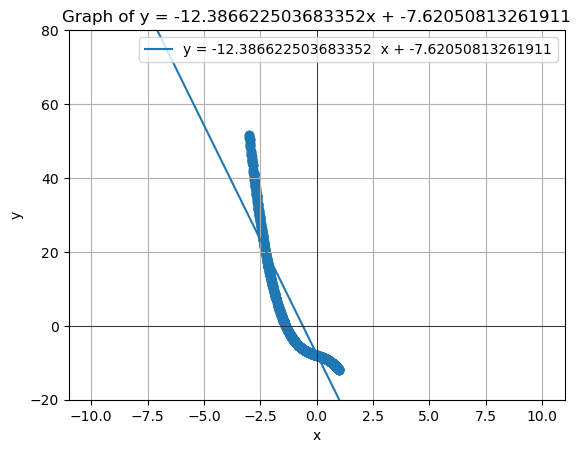

In [202]:
a,b, cost, cost_every_epoch = gradient_descent_with_adam_minibatch(data, 1)
plot_linear_function(a,b, data)

## Task2. 
Model : $$ y = ax^2 + bx + c$$
Approach : Normal Equation 

In [193]:
data

,x,y
0,-1.572851,2.927733
1,-2.424197,25.341094
2,0.402431,-8.935209
3,-1.648521,4.257155
4,-1.899214,9.499411
...,...,...
995,-0.388337,-7.106198
996,-1.474044,1.353707
997,-1.799926,7.262406
998,-1.639442,4.091766


In [194]:
Y = data['y']
tempX = data['x']
quadX = tempX ** 2
one = pd.Series(np.ones(1000))
X = pd.DataFrame((quadX, tempX, one)).transpose(copy=True)
X.columns = ['x2','x','1']
X

,x2,x,1
0,2.473861,-1.572851,1.0
1,5.876730,-2.424197,1.0
2,0.161950,0.402431,1.0
3,2.717622,-1.648521,1.0
4,3.607014,-1.899214,1.0
...,...,...,...
995,0.150806,-0.388337,1.0
996,2.172805,-1.474044,1.0
997,3.239732,-1.799926,1.0
998,2.687769,-1.639442,1.0


In [195]:
transX = X.transpose(copy=True)
quad_form = transX.dot(X)
quad_form

,x2,x,1
x2,11061.548519,-4593.622523,2195.472936
x,-4593.622523,2195.472936,-940.939854
1,2195.472936,-940.939854,1000.000000


In [196]:
inversed_quad = np.linalg.inv(quad_form.values)
inversed_quad

array([[ 0.00073309,  0.00141447, -0.00027854],
       [ 0.00141447,  0.00349249,  0.00018078],
       [-0.00027854,  0.00018078,  0.00178163]])

In [197]:
rrOperand = transX.dot(Y)
theta = inversed_quad.dot(rrOperand)
theta

array([  5.82074893,  -1.05708197, -10.70482255])

In [198]:
cost = 0
for i in range(0, data.shape[0]-1):
    cost += (theta[0]*X['x2'][i]+theta[1]*X['x'][i]+theta[2]*X['1'][i] - Y[i])**2
print(cost/data.shape[0])

5.495148548341097


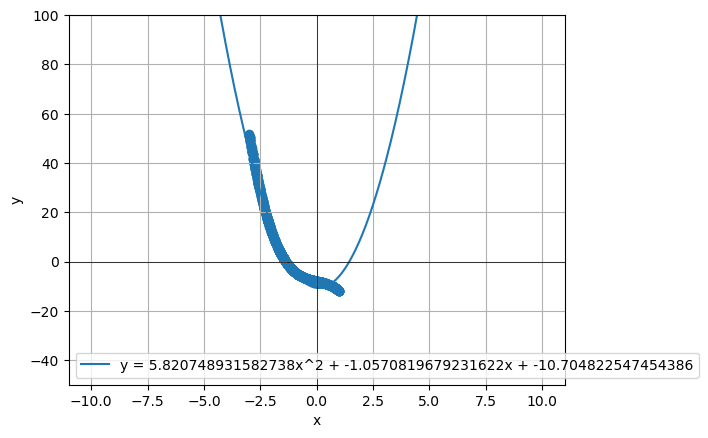

In [199]:
x = np.linspace(-10, 10, 400)
a = theta[0] 
b = theta[1] 
c = theta[2] 
y = a*x**2 + b*x + c


plt.plot(x, y, label=f'y = {a}x^2 + {b}x + {c}')
plt.scatter(data['x'], data['y'])
plt.ylim([-50, 100])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()